<a href="https://www.kaggle.com/code/jaipawar/diamond-price-prediction?scriptVersionId=94237964" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

We will try to predict price of diamonds based on its:
* carat: Carat weight of the diamond.
* cut: Cut quality of the diamond, in increasing order: Fair, Good, Very Good, Premium and Ideal.
* color: Color of the diamond, in increaing order: D being best and J being worst.
* clarity: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1.
* depth: The height of a diamond, measured from the culet to the table, divided by its average girdle diameter.
* table: The width of the diamond's table expressed as a percentage of its average diameter.
* x: length of the diamond in mm.
* y: height of the diamond in mm.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Data Gathering and Analysis

In [2]:
# Load dataset
dataset = pd.read_csv('../input/diamonds/diamonds.csv')

dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* The first column is index numbers, which is redundant and useless. We will drop it later.
* 'price' is the dependent variable and the rest are independent variables.



In [3]:
# Dropping index column
dataset = dataset.iloc[:,1:]

dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data Summarization

In [4]:
# Check dimensions
dataset.shape

(53940, 10)

In [5]:
# Check datatypes
dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

* 'cut', 'color' and 'clarity' are categorical variables, the rest are numerical variables.

In [6]:
# Segregating numerical and categorical features
numerical_feats = dataset.dtypes[dataset.dtypes != 'object'].index
categorical_feats = dataset.dtypes[dataset.dtypes == 'object'].index
print('Numerical features: {}'.format(numerical_feats))
print('Number of numerical features: {}'.format(len(numerical_feats)))
print()
print('Categorical features: {}'.format(categorical_feats))
print('Number of categorical features: {}'.format(len(categorical_feats)))

Numerical features: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Number of numerical features: 7

Categorical features: Index(['cut', 'color', 'clarity'], dtype='object')
Number of categorical features: 3


In [7]:
# Statistical summary
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* Varying min-max values of each variable suggest scaling.
* Non-zero means and non-unit standard deviations suggest power transforms.

In [8]:
# Check skew of numerical columns
print("SKEW:")
print(dataset[numerical_feats].skew())
print("KURTOSIS:")
print(dataset[numerical_feats].kurt())

SKEW:
carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64
KURTOSIS:
carat     1.256635
depth     5.739415
table     2.801857
price     2.177696
x        -0.618161
y        91.214557
z        47.086619
dtype: float64


* Most variables have slight positive skew, suggesting power transforms.

In [9]:
dataset.describe().corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.999999,0.999999,0.947399,1.000000,1.000000,1.000000
depth,0.999999,1.000000,1.000000,0.947535,0.999999,0.999999,0.999999
table,0.999999,1.000000,1.000000,0.947641,0.999999,1.000000,1.000000
price,0.947399,0.947535,0.947641,1.000000,0.947416,0.947687,0.947541
x,1.000000,0.999999,0.999999,0.947416,1.000000,1.000000,1.000000
y,1.000000,0.999999,1.000000,0.947687,1.000000,1.000000,1.000000
z,1.000000,0.999999,1.000000,0.947541,1.000000,1.000000,1.000000


* Multiple independent variables are highly correlated with each other.

In [10]:
# Check missing values
dataset.describe().isna().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

* No missing values in our dataset.

## Data visualization

### 1. Univariate visualization

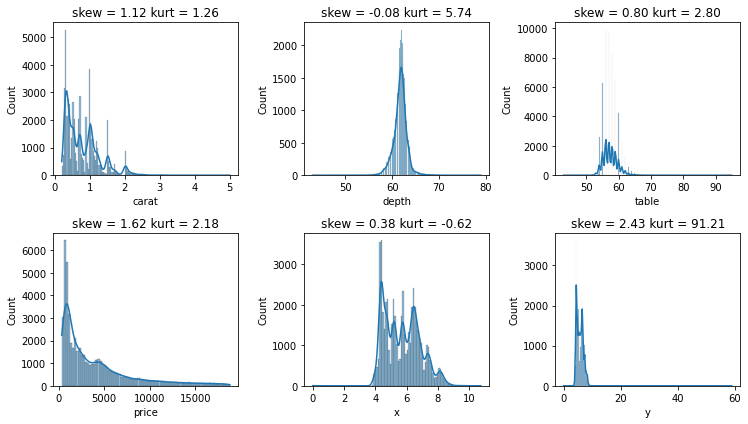

In [11]:
# Histograms and KDE
s_rows = 2
s_cols = 3

fig, axes = plt.subplots(s_rows, s_cols, figsize=(s_cols*3.5, s_rows*3))

for r in range(0, s_rows):
    for c in range(0, s_cols):
        i = r*s_cols + c
        if i < len(numerical_feats):
            sns.histplot(dataset[numerical_feats[i]], ax=axes[r][c], kde=True)
            sub_plot_titles = 'skew = {0:.2f}'.format(dataset[numerical_feats[i]].skew()) + ' kurt = {0:.2f}'.format(dataset[numerical_feats[i]].kurt())
            axes[r][c].set_title(sub_plot_titles)

plt.tight_layout()

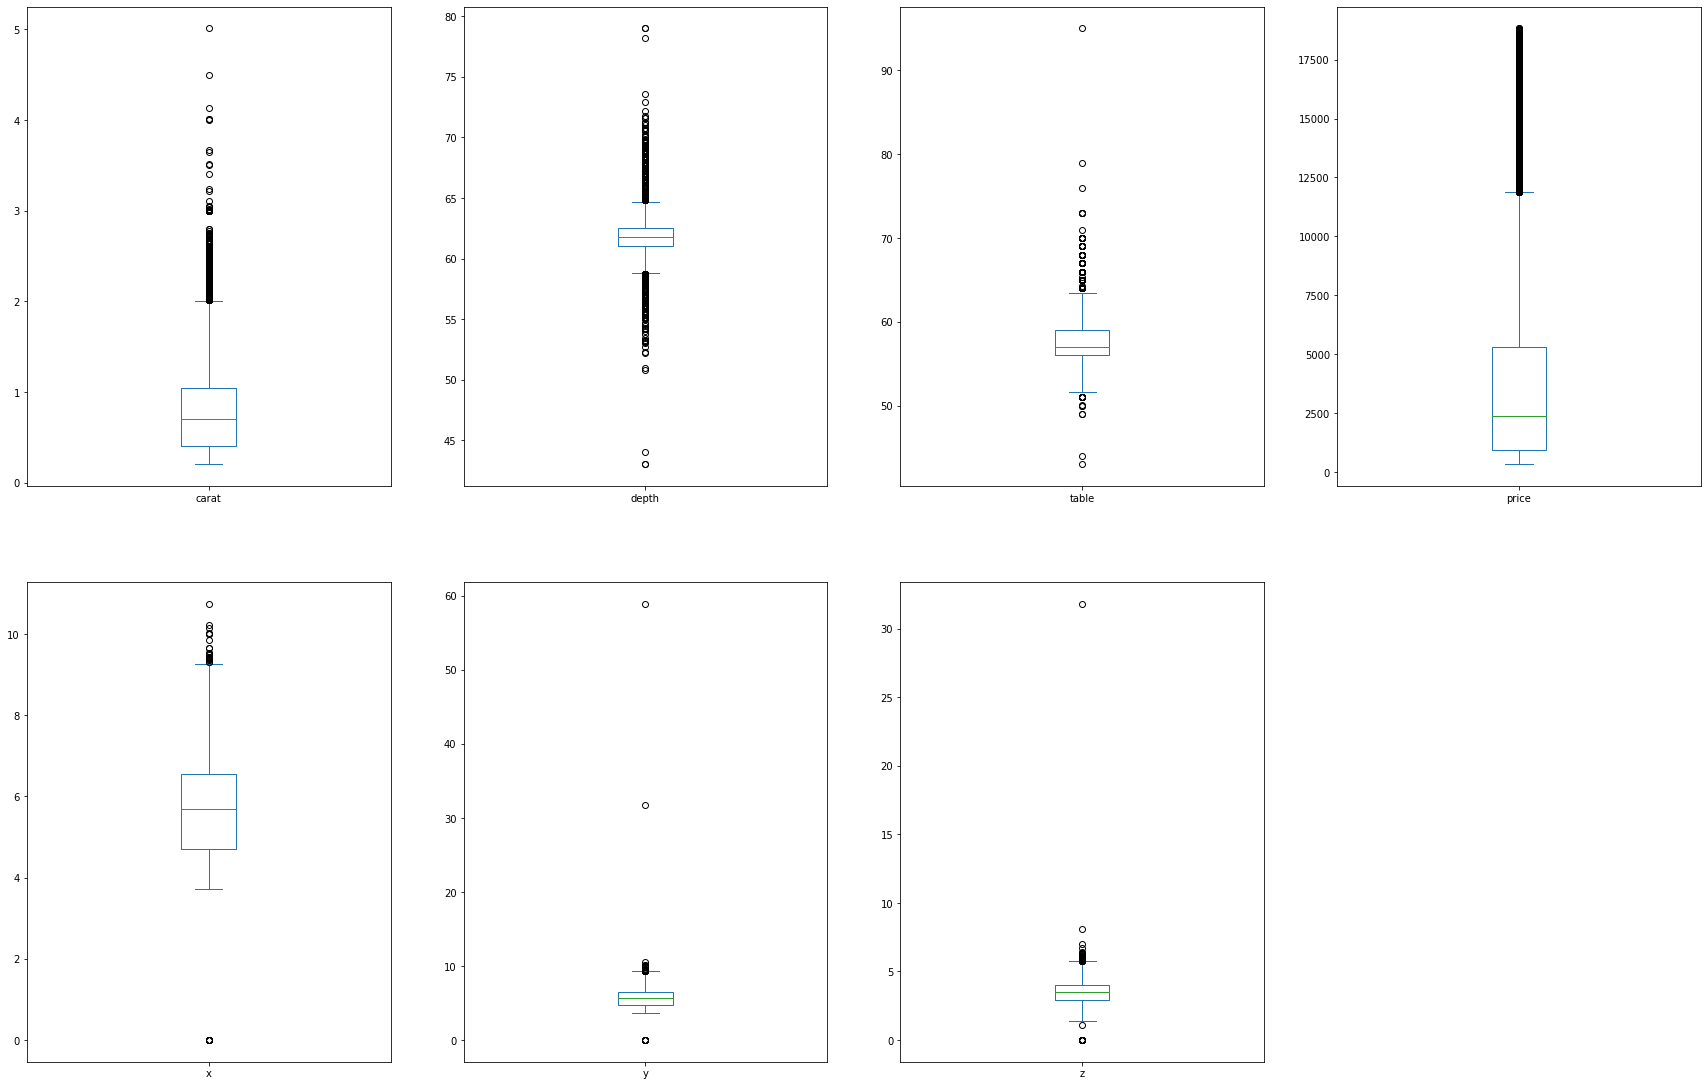

In [12]:
dataset.plot(kind='box', subplots=True, figsize=(30,30),layout=(3,4), sharex=False, sharey=False)
plt.show()

### 2. Multivariate visualization

<AxesSubplot:>

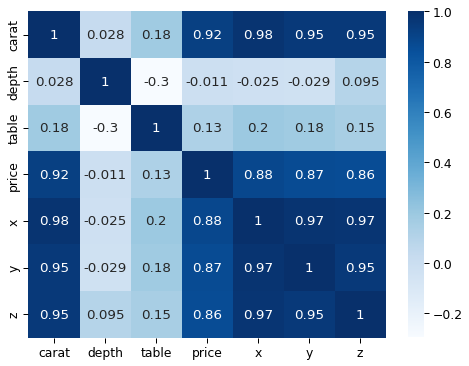

In [13]:
# Heatmap
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

dataset_mx = dataset.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(dataset_mx, annot=True, cmap='Blues')

## Data preprocessing

### Data cleaning

In [14]:
# Check if rows are duplicated
duplicates = dataset.duplicated()
print(duplicates.any())
# dataset[duplicates]

True


### Data transforms

In [15]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# X[numerical_feats] = scaler.fit_transform(X[numerical_feats])
# Y = scaler.fit_transform(Y)
dataset[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']] = scaler.fit_transform(dataset[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']])

dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


In [16]:
# Encoding categorical features
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
dataset[categorical_feats] = encoder.fit_transform(dataset[categorical_feats])

dataset[categorical_feats].head()

,cut,color,clarity
0,2.0,1.0,3.0
1,3.0,1.0,2.0
2,1.0,1.0,4.0
3,3.0,5.0,5.0
4,1.0,6.0,3.0


In [17]:
# Rechecking dataset for applied transformations
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,2.0,1.0,3.0,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,3.0,1.0,2.0,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,1.0,1.0,4.0,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,3.0,5.0,5.0,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,1.0,6.0,3.0,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


## Model evaluation

In [18]:
# Splitting dataset in target and features
X = dataset.loc[:, dataset.columns != 'price']
Y = dataset['price']
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.006237,2.0,1.0,3.0,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,3.0,1.0,2.0,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,1.0,1.0,4.0,0.386111,0.423077,0.377095,0.069100,0.072642
3,0.018711,3.0,5.0,5.0,0.538889,0.288462,0.391061,0.071817,0.082704
4,0.022869,1.0,6.0,3.0,0.563889,0.288462,0.404097,0.073854,0.086478


In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


# Select evaluation metric
metric = 'neg_mean_squared_error'

# Select models
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(5)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=metric)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.008778 (0.010192)
LASSO: -0.056006 (0.062378)
EN: -0.056006 (0.062378)
KNN: -0.012649 (0.018606)
CART: -0.011923 (0.015774)
SVR: -0.009798 (0.011387)


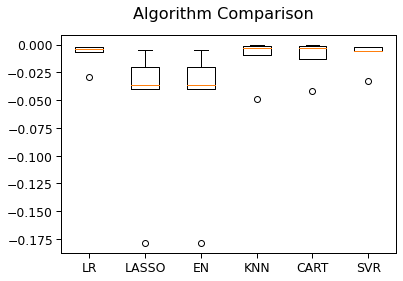

In [20]:
# Compare Algorithm performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Conclusion

Out of all algorithms Linear Regression has the lowest mean squared error, hence the best performance.